In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai import *
from fastai.vision import *
from functools import partial

## Setting up model for experimentation

In [5]:
PATH = Path('/Users/akash/Desktop/AI/Deep learning/GitHub Uploads/Donkeys vs Horses/data')
def get_data(bs=16, size=224):
    data = (ImageList.from_folder(path=PATH)
            .filter_by_folder(include=['Donkey', 'Horse'])
            .split_by_rand_pct(0.2)
            .label_from_folder()
            .transform(get_transforms(max_warp=0), size=size)
            .databunch(bs=bs)
            .normalize(imagenet_stats))
    return data

<hr>


In [6]:
data = get_data(4, 224)

In [8]:
learn = cnn_learner(data, models.resnet18, callback_fns = [ShowGraph])

In [9]:
learn.metrics.append(accuracy)

# Training

epoch,train_loss,valid_loss,accuracy,time
0,0.409531,0.203398,0.905882,01:41


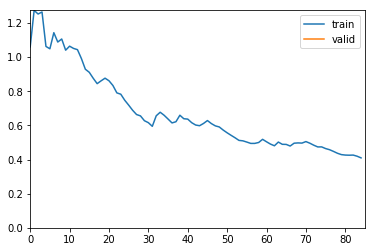

In [10]:
learn.fit_one_cycle(1)

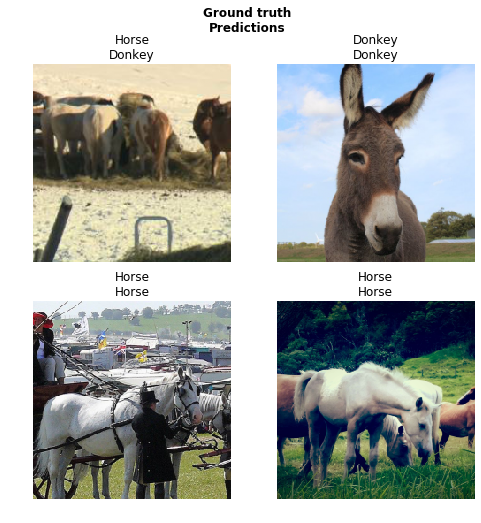

In [19]:
learn.show_results(rows=2)

In [24]:
learn.predict(data.valid_ds[0][0])[2]

tensor([0.5878, 0.4122])

## Exporting model in load_learner format

In [13]:
learn.export('export.pkl')

In [16]:
!ls {str(PATH)}

ls: /Users/akash/Desktop/AI/Deep: No such file or directory
ls: Horses/data: No such file or directory
ls: Uploads/Donkeys: No such file or directory
ls: learning/GitHub: No such file or directory
ls: vs: No such file or directory


## Results

In [25]:
mp = models.resnet34(True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/akash/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [09:21<00:00, 155360.28it/s] 


In [ ]:
learn.s